In [27]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer, load_boston

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.model_selection import KFold

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [28]:
# 데이터 로드 
wine =pd.read_excel('Wine.xls')
cereals =pd.read_excel('Cereals.xls')


# [1] Wine

In [29]:
wine

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,C,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,C,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,C,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,C,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [30]:
print(f'관측치 수 : {wine.shape[0]} \n변수 수 : {wine.shape[1]}')

관측치 수 : 178 
변수 수 : 14


In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  178 non-null    object 
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcalinity        178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB


In [32]:
target = [col for col in wine.columns if wine[col].dtype == "object"]
print(target)

feature = list(set(wine.columns) - set(target))
print(feature)

['Type']
['Alcohol', 'Malic_Acid', 'Proline', 'Color_Intensity', 'Hue', 'Ash_Alcalinity', 'Magnesium', 'Flavanoids', 'Proanthocyanins', 'Ash', 'Nonflavanoid_Phenols', 'Total_Phenols', 'OD280_OD315']


In [33]:
wine.nunique()

Type                      3
Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcalinity           63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280_OD315             122
Proline                 121
dtype: int64

In [34]:
#누락데이터 확인 - 없음
wine.isnull().sum()

Type                    0
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcalinity          0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64

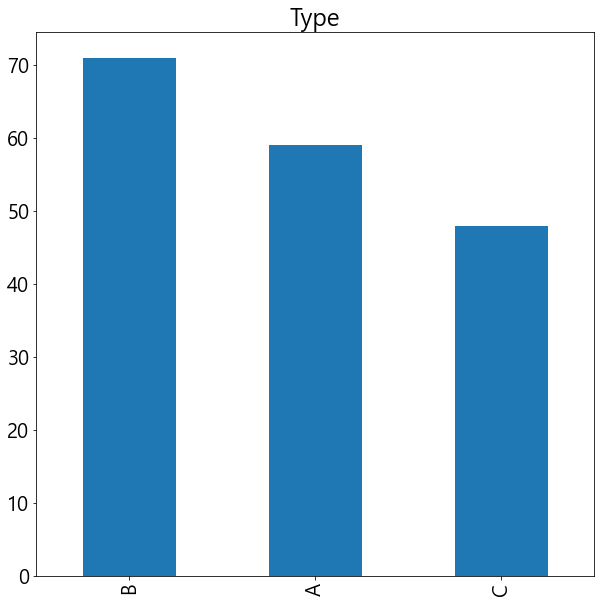

In [35]:
wine['Type'].value_counts().plot(kind='bar', figsize = (10,10))
plt.title('Type')
plt.show()

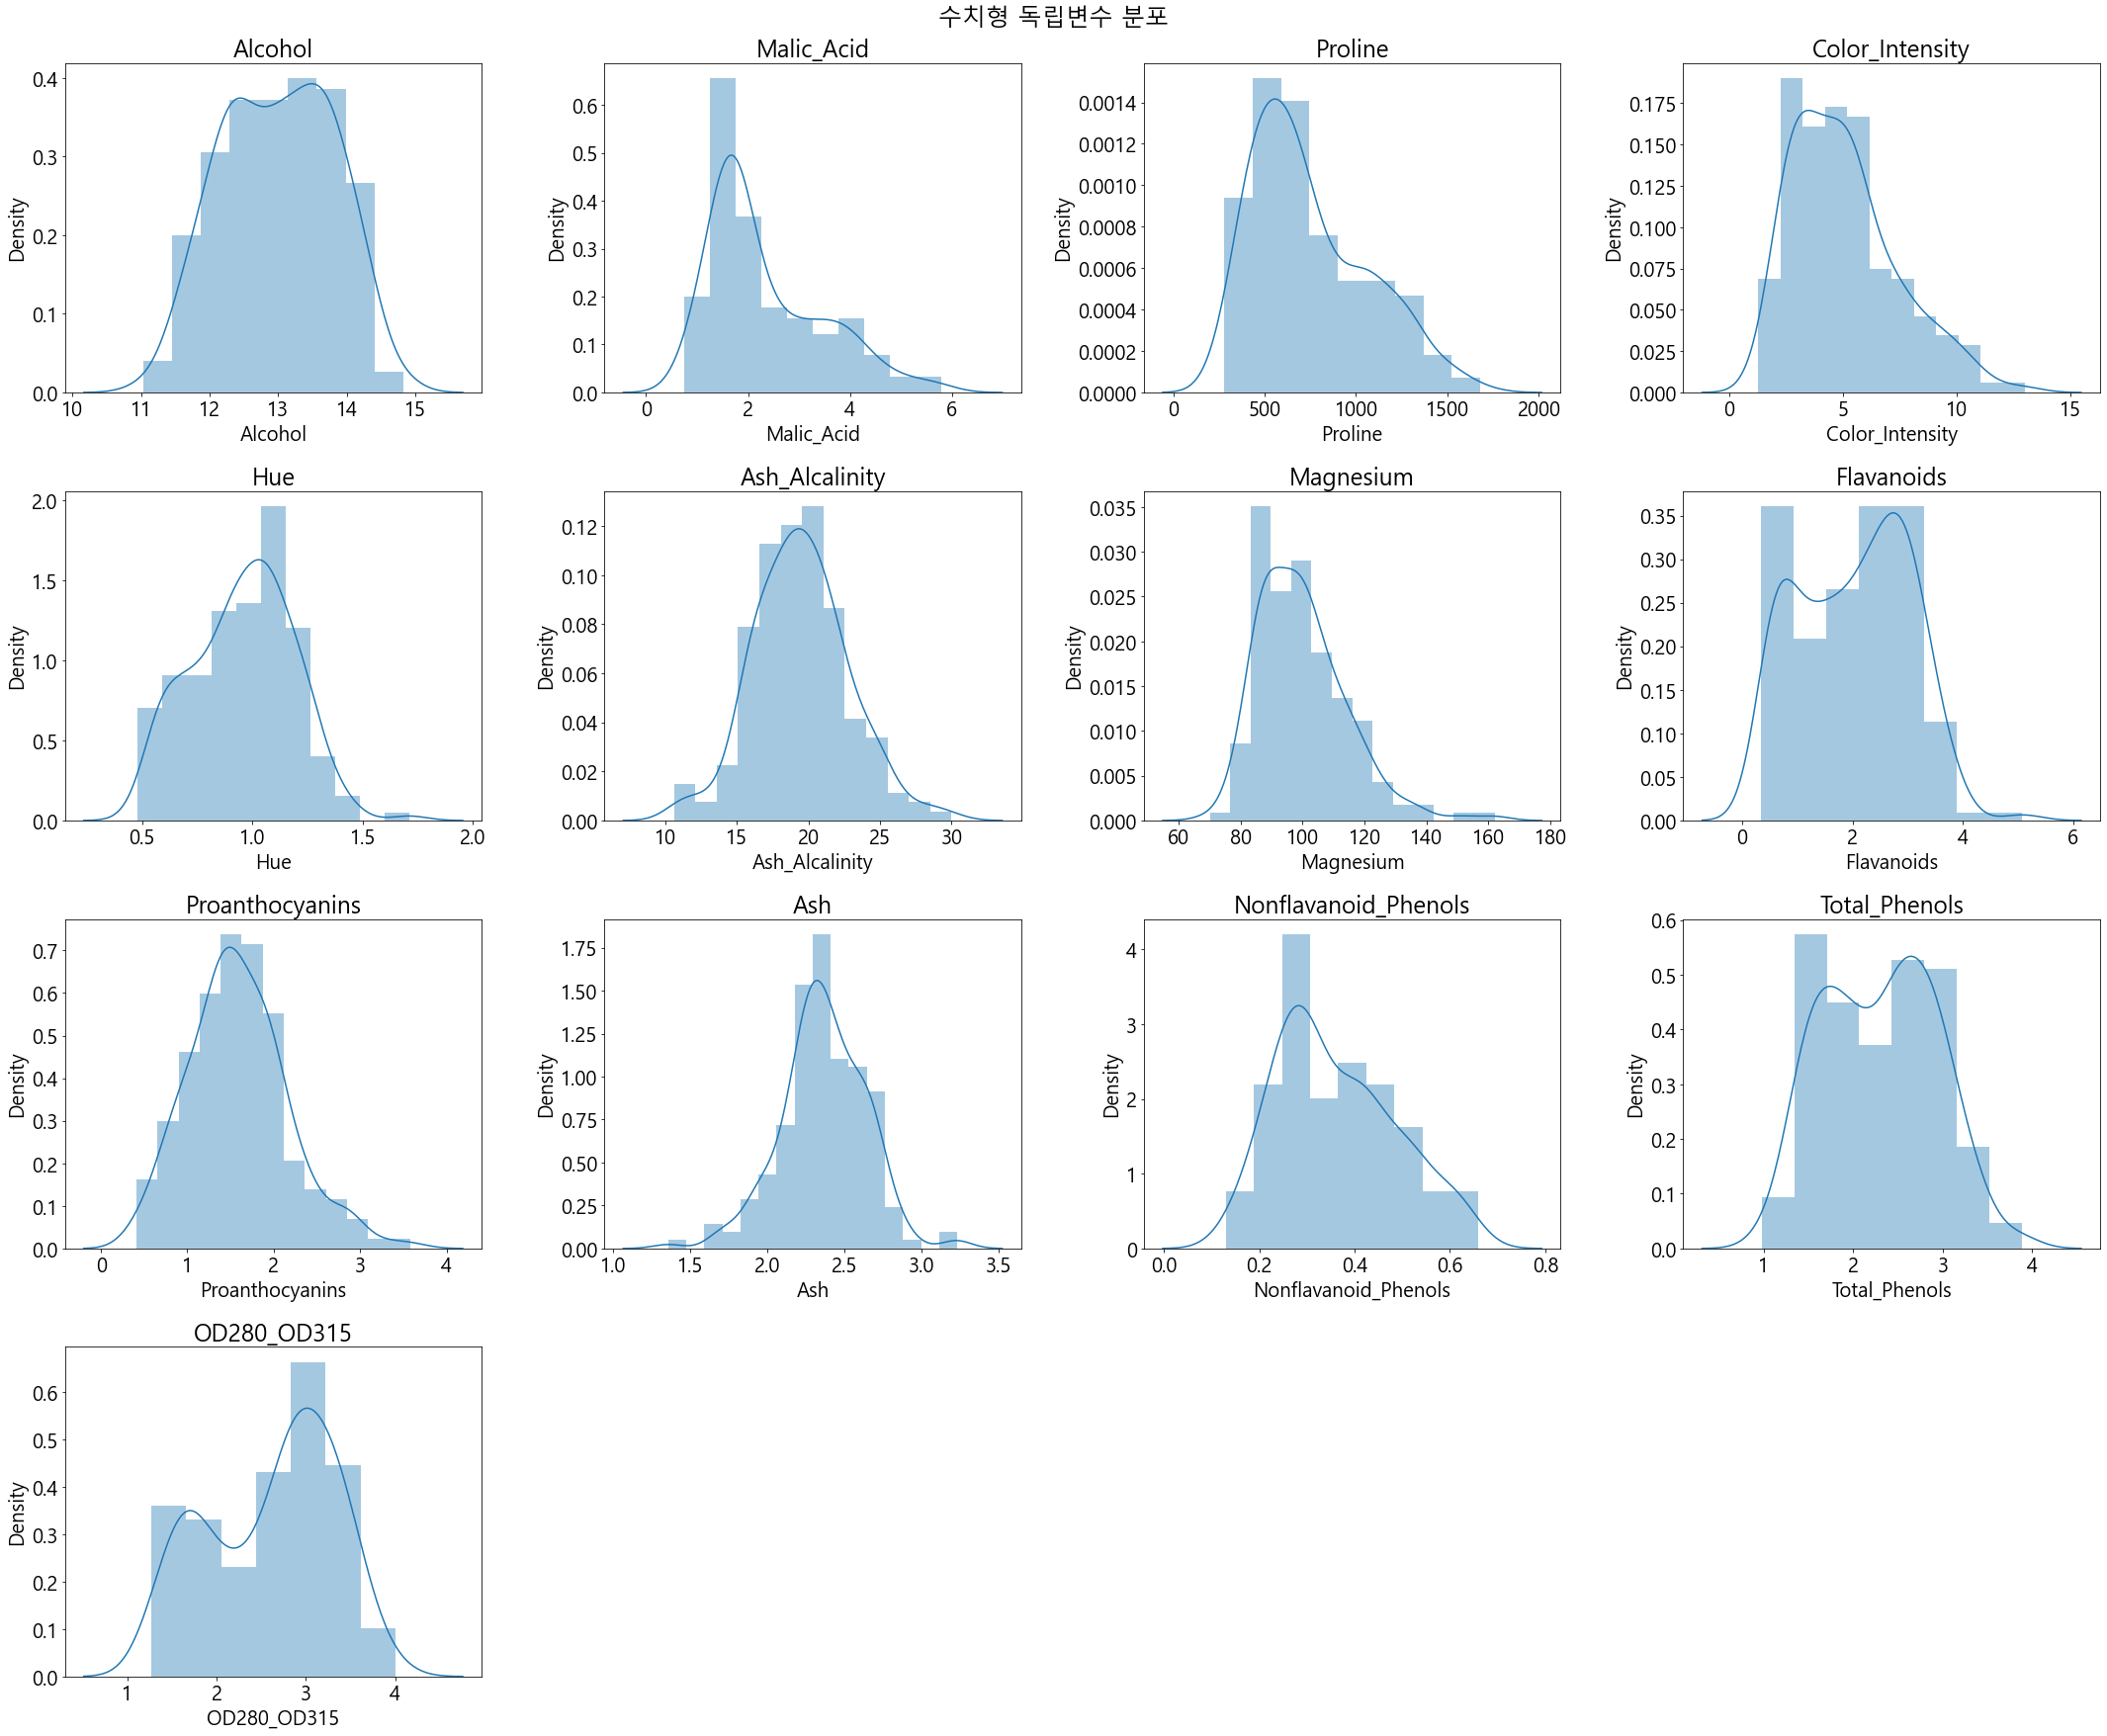

In [36]:
fig = plt.figure(figsize=(30,25))
plt.rc('font', size=20)
fig.suptitle('수치형 독립변수 분포')

for i in range(len(feature)):
    ax = fig.add_subplot(4,4,i+1)
    ax = sns.distplot(wine[feature[i]])
    plt.title(feature[i])
fig.tight_layout()
plt.show()

<AxesSubplot:>

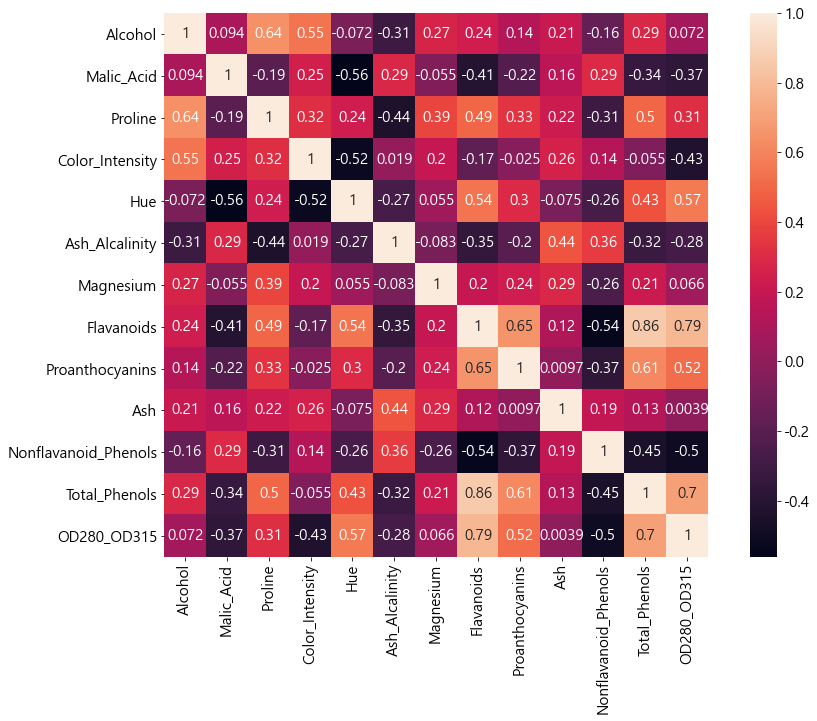

In [37]:
#상관관계분석 피어슨 이용
plt.figure(figsize=(15,10))
plt.rc('font', size=15)
sns.heatmap(wine[feature].corr(),annot=True,square = True, annot_kws={'size' : 15})


In [38]:
X = wine.drop('Type', axis=1)
y = pd.DataFrame(wine['Type'])
X

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [39]:
y

,Type
0,A
1,A
2,A
3,A
4,A
...,...
173,C
174,C
175,C
176,C


In [40]:
y.value_counts()

Type
B       71
A       59
C       48
dtype: int64

In [41]:
# Train set/ Test set 나누기 
''' stratify=y 새로 배운것 y 01 비율유지하며 데이터 스플릿'''
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=42)


print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (124, 13)
Test set dimension is (54, 13)


### 정규화 안필요한걸로 알지만 일단 둘다 해보고 비교해보자.

## 단순모델링

In [42]:
rfc = RandomForestClassifier(n_estimators=10,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [43]:
# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n") 
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9630


### 4.2 단일 하이퍼 파라미터에 대한 Grid search -n_estimator

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:32<00:00,  1.27it/s]


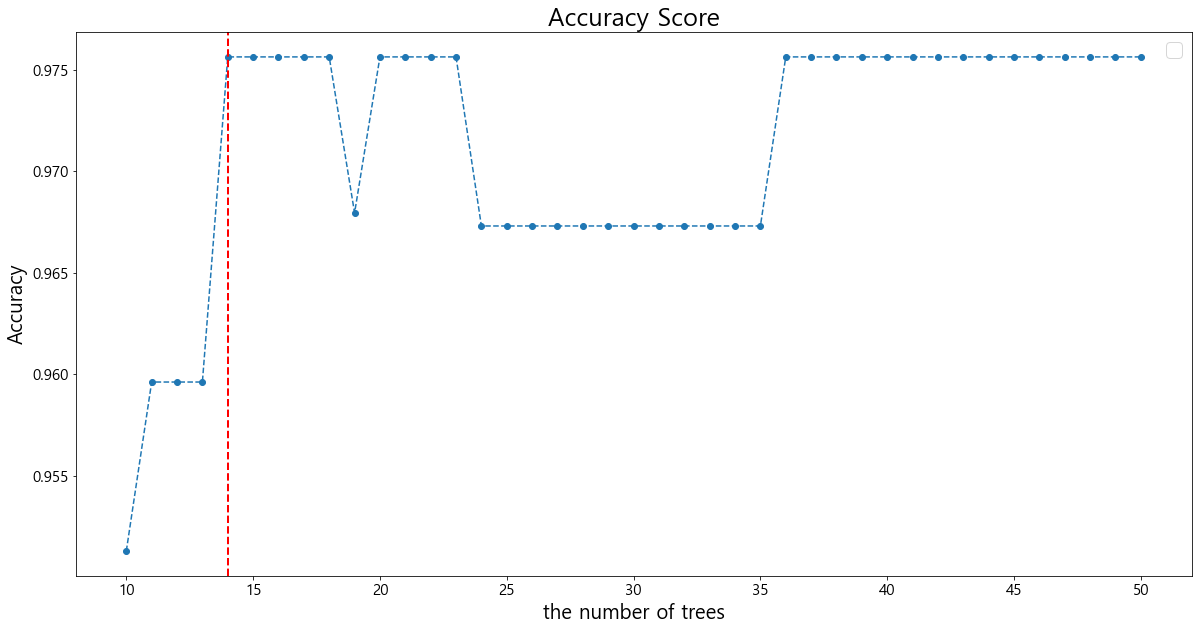

In [54]:
cv_scores = []
estimator_list =[i for i in range(10,51,1)]
for i in tqdm(range(9,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [56]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+10}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"정확도:{max(cv_scores):0.4f}")  

최적의 tree개수:14


Train set에 대한 성능 (10 fold cross validation)
정확도:0.9756


In [57]:
rfc = RandomForestClassifier(n_estimators=14, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9815


## 이후에도 혹시 성능이 더 뛰어난 것이 있나 확인 한것
하지만 이미 1인데 뭔소리야

In [58]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:1.0000


# 단일- max_depth

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.58it/s]


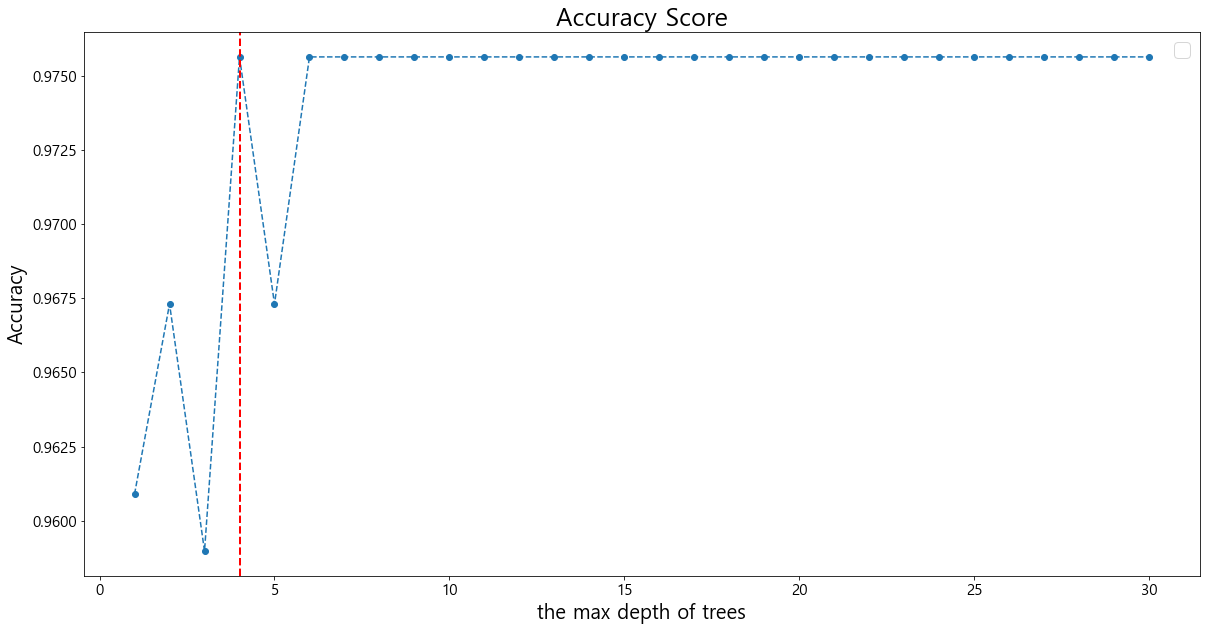

In [61]:
cv_scores = []
estimator_list =[i for i in range(1,31,1)]
for i in tqdm(range(0,30,1)):
    rfc = RandomForestClassifier(n_estimators=14,
                                 max_depth=i+1,
                                 n_jobs=-1,
                                 random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the max depth of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [62]:
print(f"최적의 max_depth:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"정확도:{max(cv_scores):0.4f}")  

최적의 max_depth:4


Train set에 대한 성능 (10 fold cross validation)
정확도:0.9756


In [63]:
rfc = RandomForestClassifier(n_estimators=14,max_depth=4, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:1.0000


# 단일 - max_leaf_nodes

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:04<00:00,  3.24s/it]


IndexError: list index out of range

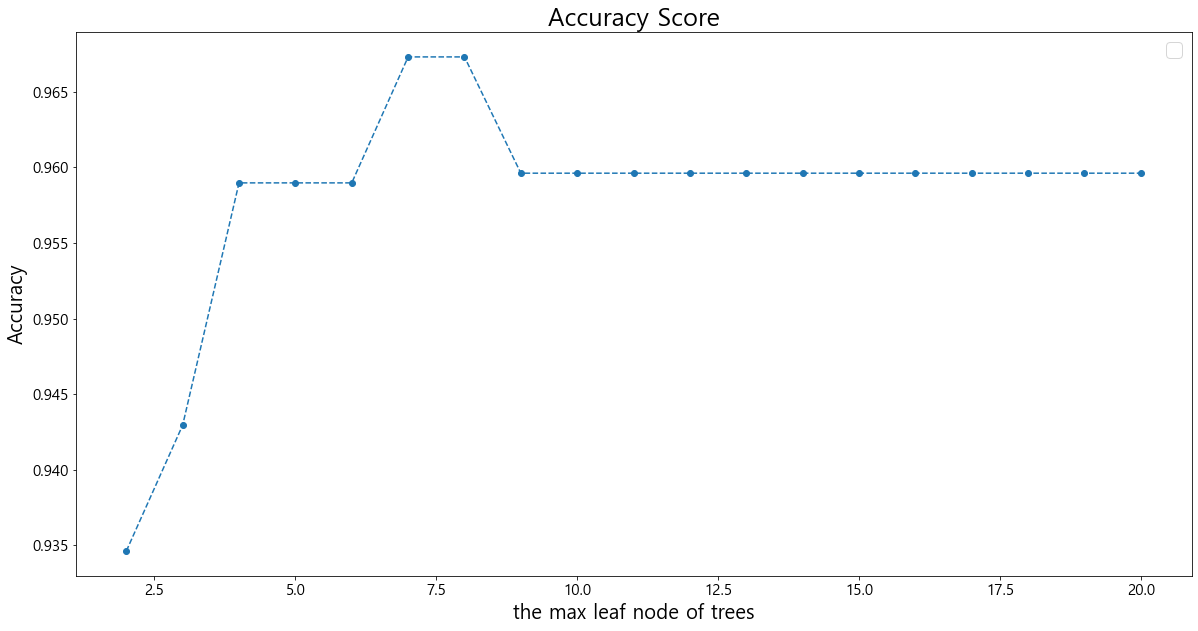

In [74]:
cv_scores = []
estimator_list =[i for i in range(1,21,1)]
for i in tqdm(range(1,21,1)):
    rfc = RandomForestClassifier(n_estimators=14,
                                 max_depth=4,
                                 max_leaf_nodes=i,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the max leaf node of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [75]:
print(f"최적의 max_leaf_nodes:{estimator_list[cv_scores.index(max(cv_scores))]}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"정확도:{max(cv_scores):0.4f}")  

최적의 max_leaf_nodes:1


Train set에 대한 성능 (10 fold cross validation)
정확도:nan


In [76]:
rfc = RandomForestClassifier(n_estimators=14,max_depth=4,max_leaf_nodes=7, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9444


In [77]:
best_rfc = RandomForestClassifier(n_estimators=14,max_depth=4, n_jobs=-1, random_state=42)
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=14, n_jobs=-1, random_state=42)

In [78]:
# Train set에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:1.0000


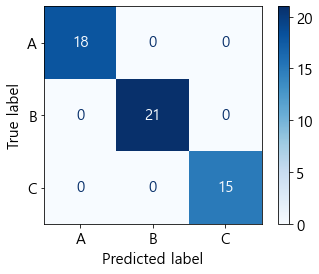

In [79]:
plot_confusion_matrix(best_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()  

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        18
           B       1.00      1.00      1.00        21
           C       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



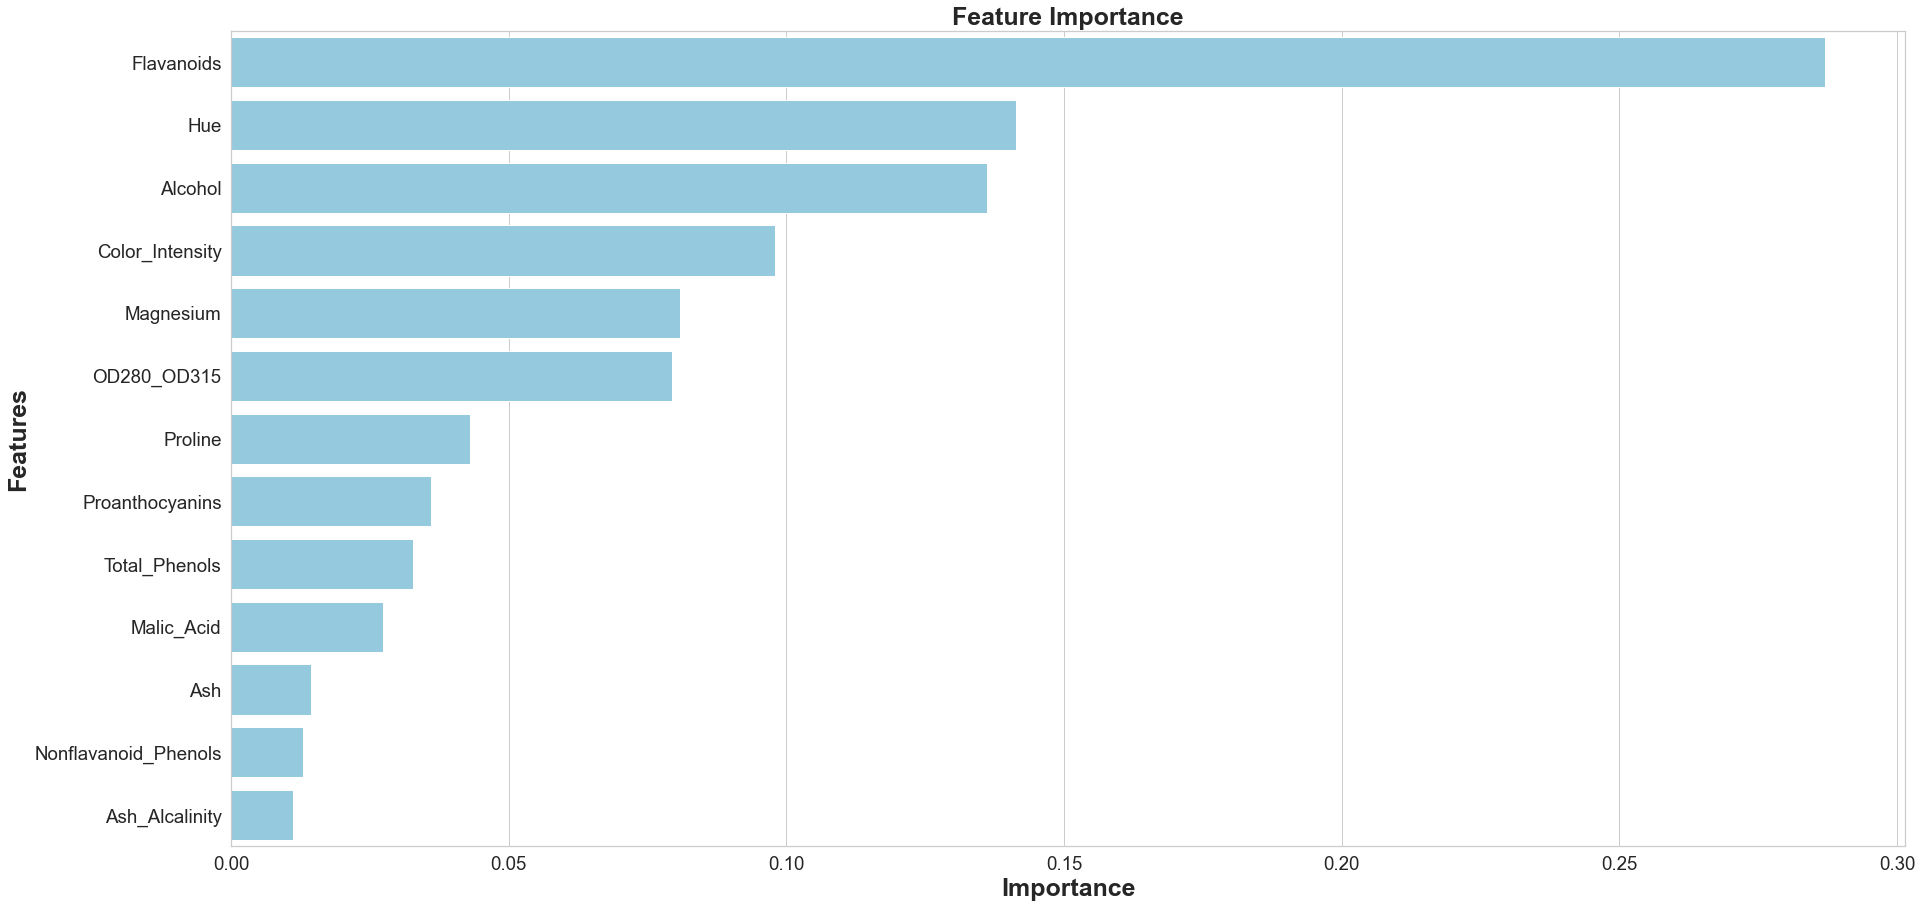

None

,Features,Gini-Importance
0,Flavanoids,0.287112
1,Hue,0.141376
2,Alcohol,0.136115
3,Color_Intensity,0.097896
4,Magnesium,0.080754
5,OD280_OD315,0.079444
6,Proline,0.042938
7,Proanthocyanins,0.035932
8,Total_Phenols,0.032678
9,Malic_Acid,0.027320


In [81]:
feats = {}
for feature, importance in zip(X_train.columns.tolist(), best_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [84]:
from sklearn.ensemble import AdaBoostClassifier,  GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [88]:
# 데이터 컬럼 단위 정규화 하기 
normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

In [89]:
## 탐색하고자 하는 하이퍼파라미터 설정 ## 
model_params = {
                'Catboost' : {'model' : CatBoostClassifier(random_seed=0, silent=True), 
                              'params' : {'max_depth':[i for i in range(1,11,2)] ,
                                          'n_estimators':[50*(i+1) for i in range(3)],
                                          'learning_rate': [0.1*(i+1) for i in range(3)]
                                     }}
                                    }

In [90]:
pbar = tqdm(total=len(model_params)) # tqdm은 학습 상태가 어느정도 됬는지 파악해주는데 유용한 함수입니다.
output = pd.DataFrame([])


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

In [91]:
# 2가지 모델에 대한 학습 시작 # 
for model_name, v in model_params.items():

    pbar.set_description(desc=f"{model_name}") # tqdm에서 활용되는 옵션입니다. 현재 학습되고 있는 모델 이름을 출력합니다.
        
    model, params = v['model'], v['params']
    gcv = GridSearchCV(estimator=model, param_grid=params, n_jobs=2 if model_name == 'Catboost' else 5, cv=3, scoring='accuracy')
    gcv.fit(X_train_scaled, y_train)
        
    result = pd.DataFrame.from_dict(gcv.cv_results_) # cv_results에는 각 fold별 예측 성능이 기록되어 있습니다.
    result['test_accuracy_with_best_hyp'] = accuracy_score(y_pred = gcv.predict(X_test_scaled) , y_true = y_test) #gcv.predict()는 최적 하이퍼파라미터가 탑재된 모델의 예측 결과를 파악하는데 사용됩니다.
    result['model_name'] = model_name
    result['seed'] = 0
    output = pd.concat([output,result])
    pbar.update(1)

output.reset_index(drop=True)       
output.to_csv('./classification_resul_wine(hw8).csv')


Catboost:   0%|                                                                                  | 0/1 [00:13<?, ?it/s]

Catboost: 100%|██████████████████████████████████████████████████████████████████████████| 1/1 [01:02<00:00, 62.29s/it]

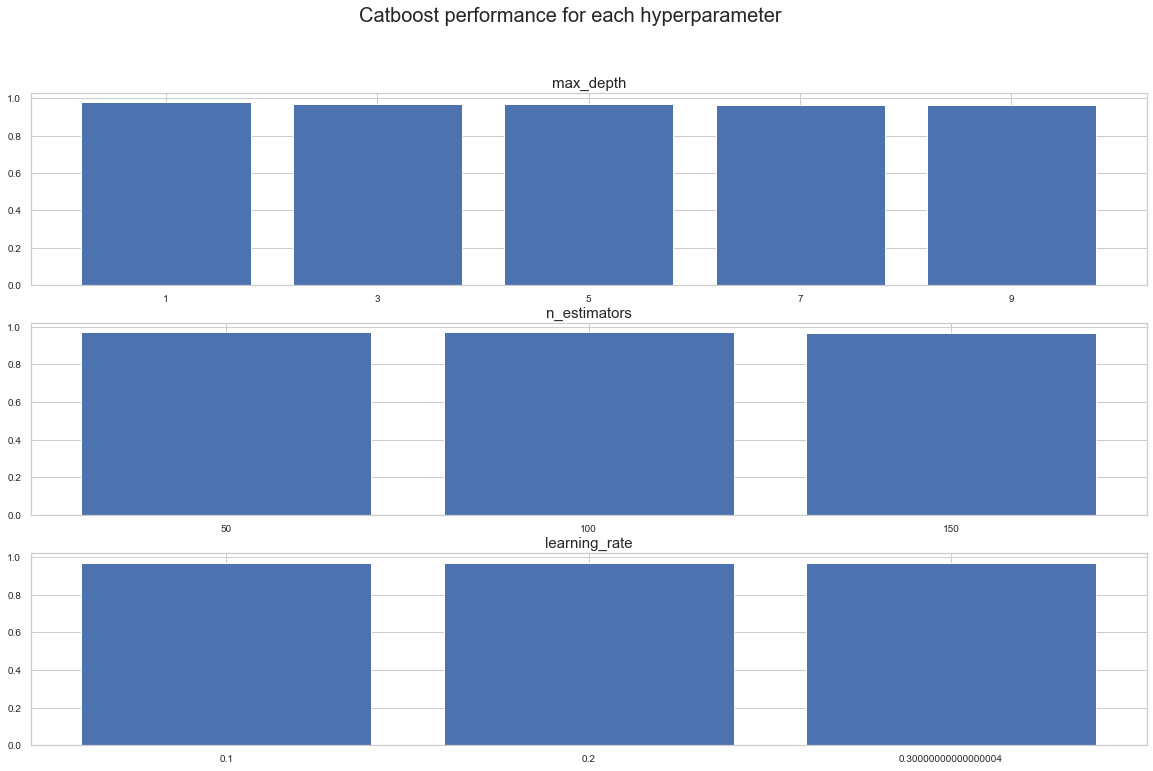

In [93]:
model_name = 'Catboost' # GBM , AdaBoost, Light GBM, Catboost 궁금한거 로 바꿔서 실행

for_plot_values = output.loc[ output['model_name'] == model_name,:] # 예측 모델별 결과 확인을 위한 indexing

fig , axs = plt.subplots(nrows=model_params[model_name]['params'].keys().__len__(), ncols=1, figsize=(20,12)) # plot configure
fig.suptitle(f'{model_name} performance for each hyperparameter',fontsize=20) # 전체 Plot 제목

for ind , param_key in enumerate(model_params[model_name]['params'].keys()):
    
    param_for_plot = for_plot_values.groupby([f'param_{param_key}'])['mean_test_score'].mean() # 조절 하이퍼파라미터 이외에 대해서는 평균 성능 (개략적)
    
    axs[ind].bar(height = param_for_plot.values,x = [i for i in range(param_for_plot.values.shape[0])]) # bar plot 
    axs[ind].tick_params(axis='both',labelsize=10) # x,y 축 글씨 폰트 설정
    
    axs[ind].set_xticks([i for i in range(param_for_plot.values.shape[0])]) # x 축 ticks 설정
    axs[ind].set_xticklabels(param_for_plot.index.to_list()) # x 축 ticks 이름 설정

    axs[ind].set_title(f'{param_key}',fontsize=15) # 내부 plot 제목 

In [96]:
for_plot_values

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,test_accuracy_with_best_hyp,model_name,seed
0,0.094747,0.060341,0.002660,1.880649e-03,0.1,1,50,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",NaN,0.97561,0.97561,NaN,NaN,45,1.0,Catboost,0
1,0.081783,0.002936,0.004987,1.348699e-06,0.1,1,100,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0
2,0.096076,0.000471,0.003657,4.702465e-04,0.1,1,150,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0
3,0.080119,0.003082,0.003324,4.705837e-04,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0
4,0.120345,0.002487,0.003325,4.703026e-04,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.976190,0.97561,0.97561,0.975803,0.000274,6,1.0,Catboost,0
5,0.157911,0.005235,0.003330,4.660889e-04,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0
6,0.118017,0.003292,0.002992,8.143934e-04,0.1,5,50,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0
7,0.299532,0.130233,0.004986,3.549792e-03,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0
8,0.496007,0.172408,0.003657,4.699093e-04,0.1,5,150,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0
9,0.265955,0.010247,0.004322,4.701341e-04,0.1,7,50,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.976190,0.97561,0.95122,0.967673,0.011637,11,1.0,Catboost,0


<Figure size 720x720 with 0 Axes>

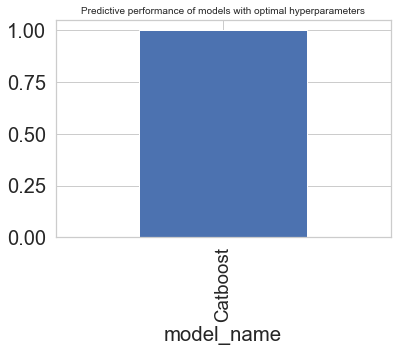

In [94]:
output.reset_index(drop=True,inplace=True) # index 초기화
plt.figure(figsize=(10,10))

idx = output.groupby(['model_name'])['mean_test_score'].idxmax() # 각 모델별 검증용 accuracy를 기준하여, Best 성능을 기록한 경우 추출
output.loc[idx,['model_name','test_accuracy_with_best_hyp']].set_index('model_name').plot.bar(legend=False)
plt.title('Predictive performance of models with optimal hyperparameters',fontsize=10)
plt.yticks(fontsize=20)
plt.show()

In [104]:
cat = CatBoostClassifier(random_seed=0, silent=True, max_depth=1, n_estimators = 50, learning_rate=0.3)

In [105]:
cat.fit(X_train, y_train)

In [106]:
# Train set에 대한 성능
y_pred = cat.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = cat.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:1.0000


Test set에 대한 성능
정확도:0.9815
